# Nobel Winners Data Explored

## Setup

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [3]:
matplotlib.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["font.size"] = 14

## Starting to Explore

In [4]:
df = pd.read_json("../nobel_winners_cleaned.json")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   link            981 non-null    object
 1   name            981 non-null    object
 2   year            981 non-null    int64 
 3   category        981 non-null    object
 4   country         981 non-null    object
 5   text            981 non-null    object
 6   date_of_birth   981 non-null    object
 7   place_of_birth  980 non-null    object
 8   gender          981 non-null    object
 9   date_of_death   681 non-null    object
 10  place_of_death  679 non-null    object
 11  award_age       981 non-null    int64 
 12  born_in         140 non-null    object
 13  image_urls      659 non-null    object
 14  mini_bio        659 non-null    object
 15  bio_image       659 non-null    object
dtypes: int64(2), object(14)
memory usage: 122.8+ KB


In [6]:
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)

## Gender Disparities

#### Female Physics Nobel Prize winners

In [7]:
by_cat_gen = df.groupby(["category", "gender"])
by_cat_gen.get_group(("Physics", "female"))[["name", "year"]]

,name,year
62,Andrea Ghez,2020
68,Anne L'Huillier,2023
210,Donna Strickland,2018
616,Maria Goeppert-Mayer,1963
618,Marie Skłodowska-Curie,1903


#### Number of Nobel Prize winners, by gender, in each category

In [8]:
by_cat_gen.size()

category                gender
Chemistry               female      8
                        male      187
Economics               female      3
                        male       93
Literature              female     18
                        male      102
Peace                   female     19
                        male       92
Physics                 female      5
                        male      223
Physiology or Medicine  female     13
                        male      218
dtype: int64

<Axes: ylabel='category,gender'>

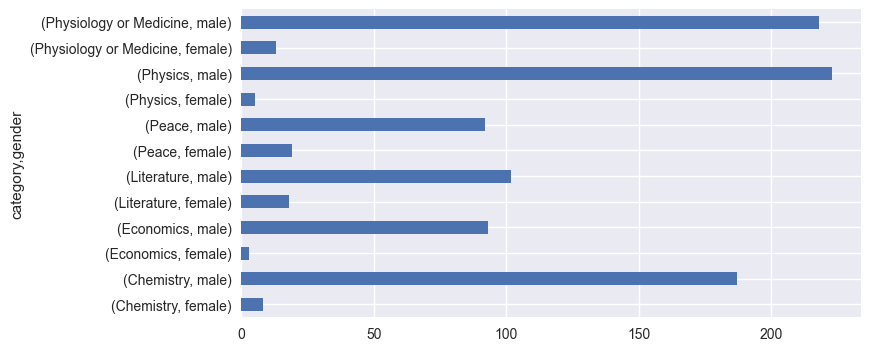

In [9]:
by_cat_gen.size().plot(kind="barh")

<Axes: ylabel='category'>

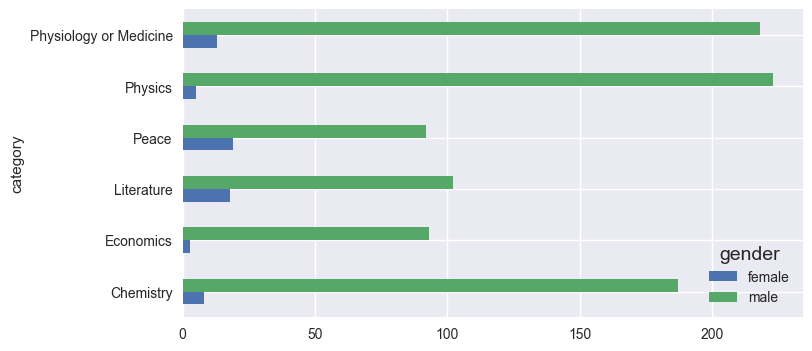

In [10]:
# unstacked
by_cat_gen.size().unstack().plot(kind="barh")

In [11]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz

gender,female,male
category,,
Chemistry,8,187
Economics,3,93
Literature,18,102
Peace,19,92
Physics,5,223
Physiology or Medicine,13,218


In [12]:
cat_gen_sz["ratio"] = cat_gen_sz.female / (cat_gen_sz.female + cat_gen_sz.male)
cat_gen_sz

gender,female,male,ratio
category,,,
Chemistry,8,187,0.041026
Economics,3,93,0.031250
Literature,18,102,0.150000
Peace,19,92,0.171171
Physics,5,223,0.021930
Physiology or Medicine,13,218,0.056277


#### Percentage of female nobel prize winners per category

In [13]:
cat_gen_sz["female_pc"] = cat_gen_sz["ratio"] * 100
cat_gen_sz

gender,female,male,ratio,female_pc
category,,,,
Chemistry,8,187,0.041026,4.102564
Economics,3,93,0.031250,3.125000
Literature,18,102,0.150000,15.000000
Peace,19,92,0.171171,17.117117
Physics,5,223,0.021930,2.192982
Physiology or Medicine,13,218,0.056277,5.627706


Text(0.5, 0, '% of female winners')

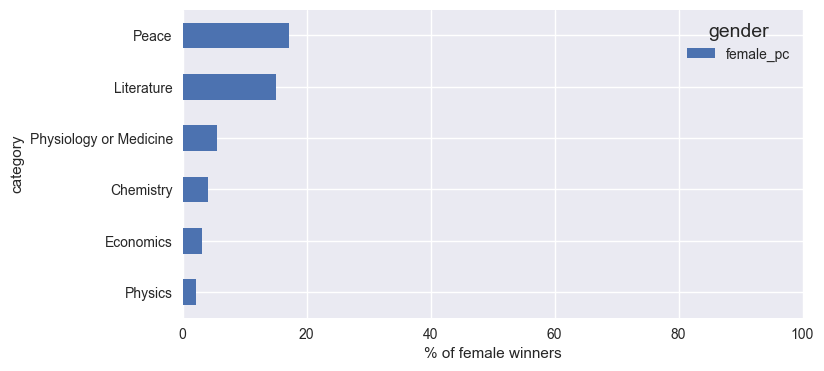

In [14]:
cat_gen_sz = cat_gen_sz.sort_values(by="female_pc", ascending=True)
ax = cat_gen_sz[["female_pc"]].plot(kind="barh")
ax.set_xlim([0,100])
ax.set_xlabel("% of female winners")

### Historical Trends

#### Prizes by year and gender

In [15]:
def thin_xticks(ax, tick_gap=10, rotation=45):
    """ Thin x-ticks and adjust rotation """
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    plt.show()

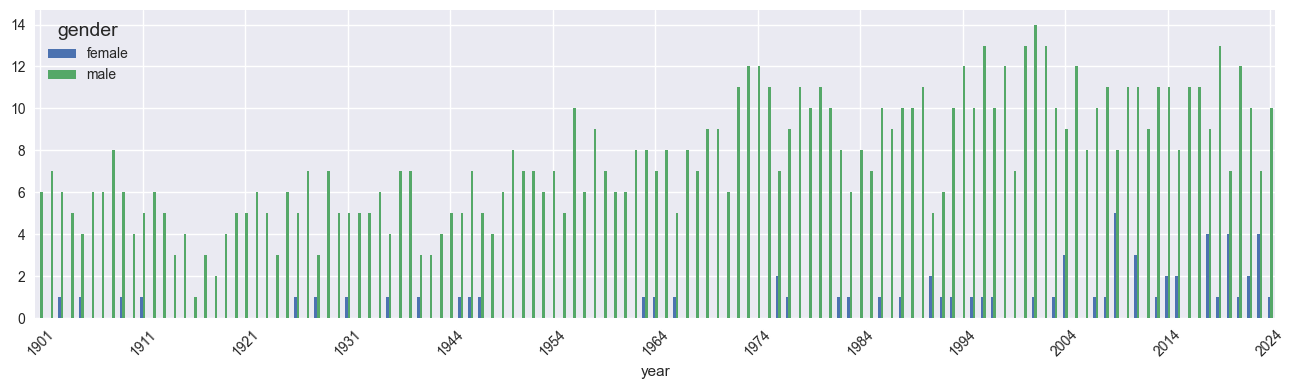

In [16]:
by_year_gender = df.groupby(["year", "gender"])
year_gen_sz = by_year_gender.size().unstack()
ax = year_gen_sz.plot(kind="bar", figsize=(16,4))
thin_xticks(ax)

#### Stacked gender prizes by year

Text(0.5, 0, 'Year')

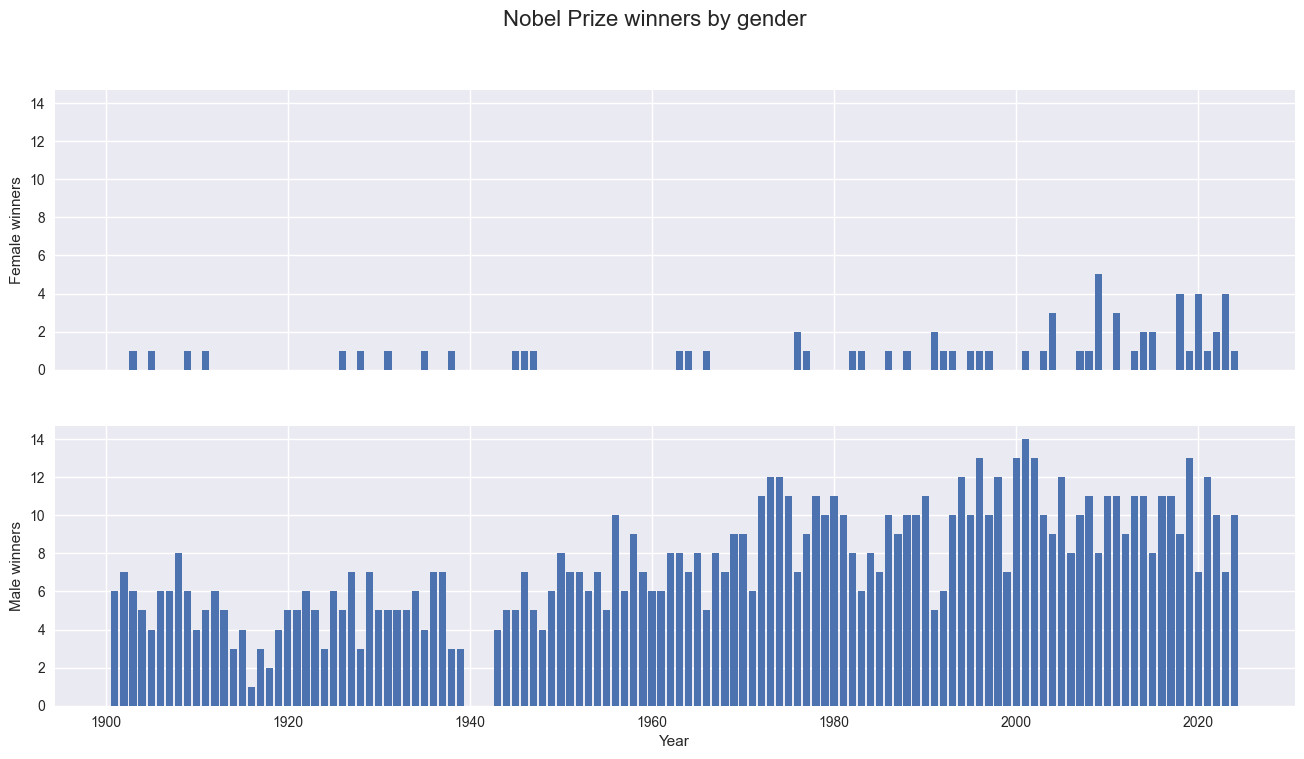

In [17]:
new_index = pd.Index(np.arange(1901, 2025), name="year")
year_gen_sz = year_gen_sz.reindex(new_index)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(16,8))

ax_f = axes[0]
ax_m = axes[1]

fig.suptitle("Nobel Prize winners by gender", fontsize=16)

ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel("Female winners")

ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel("Male winners")

ax_m.set_xlabel("Year")

## National Trends

#### Absolute number of prize winners

<Axes: xlabel='country'>

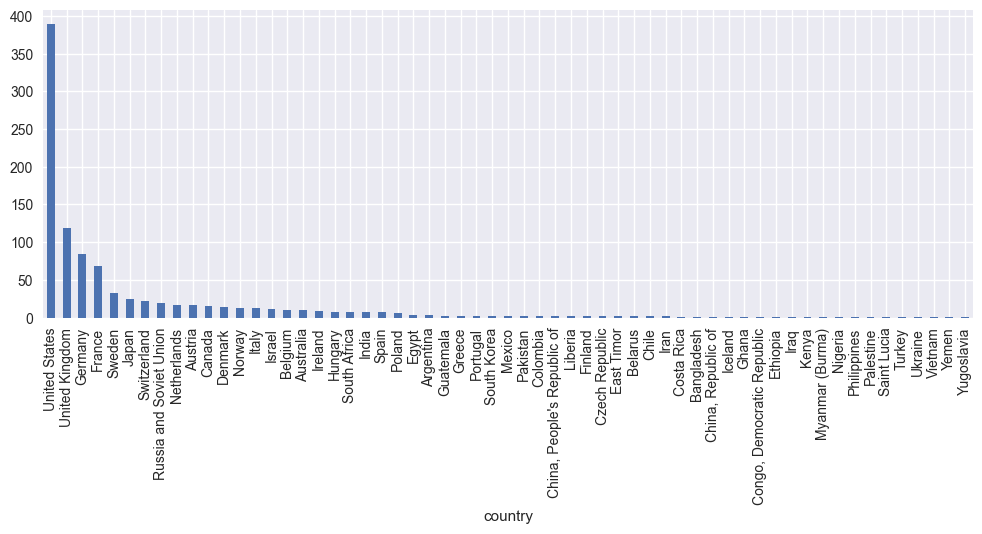

In [19]:
df.groupby("country").size().sort_values(ascending=False).plot(kind="bar", figsize=(12,4))

### Prize Winners Per Capita

In [29]:
nat_group = df.groupby("country")
ngsz = nat_group.size()
ngsz.index

Index(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium',
       'Canada', 'Chile', 'China, People's Republic of', 'China, Republic of',
       'Colombia', 'Congo, Democratic Republic', 'Costa Rica',
       'Czech Republic', 'Denmark', 'East Timor', 'Egypt', 'Ethiopia',
       'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Hungary', 'Iceland', 'India', 'Iran', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Kenya', 'Liberia', 'Mexico', 'Myanmar (Burma)',
       'Netherlands', 'Nigeria', 'Norway', 'Pakistan', 'Palestine',
       'Philippines', 'Poland', 'Portugal', 'Russia and Soviet Union',
       'Saint Lucia', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'United States',
       'Vietnam', 'Yemen', 'Yugoslavia'],
      dtype='object', name='country')

#### National prize numbers per capita

<Axes: xlabel='name'>

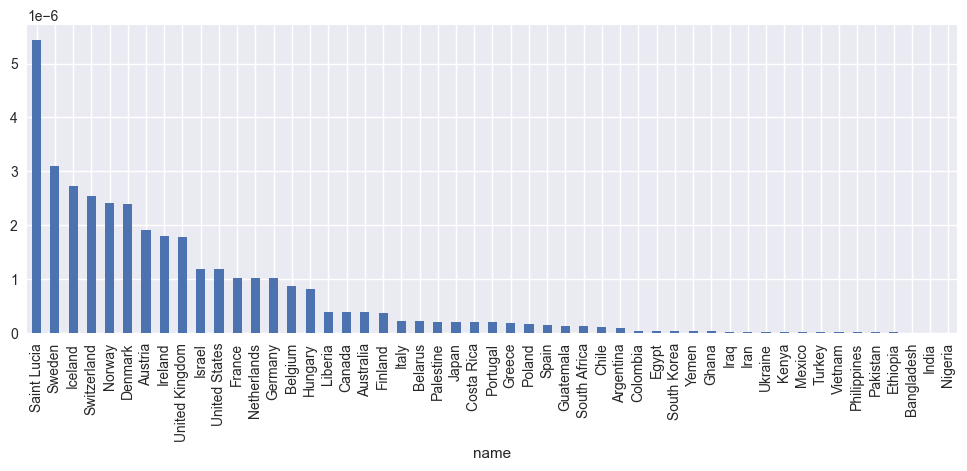

In [56]:
df_countries = pd.read_json("world_country_data.json")
df_countries["name"] = df_countries["name"].apply(lambda x: x["common"])
df_countries = df_countries.set_index("name")
df_countries = df_countries[df_countries.index.isin(ngsz.index)]
df_countries["nobel_wins"] = ngsz
df_countries["nobel_wins_per_capita"] = df_countries.nobel_wins / df_countries.population

df_countries.sort_values(by="nobel_wins_per_capita", ascending=False).nobel_wins_per_capita.plot(kind="bar", figsize=(12,4))

#### National prize numbers per capita, filtered for three or more wins

<Axes: xlabel='name'>

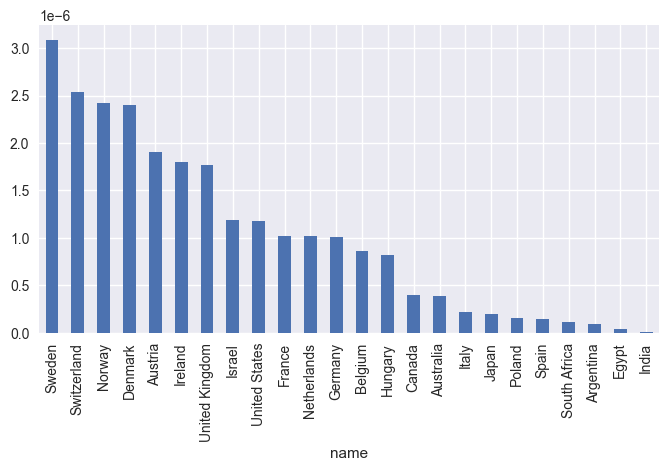

In [59]:
df_countries[df_countries.nobel_wins > 2].sort_values(by="nobel_wins_per_capita", ascending=False).nobel_wins_per_capita.plot(kind="bar")

### Prizes by Category

In [67]:
nat_cat_sz = df.groupby(["country", "category"]).size().unstack()
nat_cat_sz

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,1.0
Australia,NaN,NaN,1.0,NaN,2.0,7.0
Austria,2.0,1.0,2.0,2.0,4.0,6.0
Bangladesh,NaN,NaN,NaN,1.0,NaN,NaN
Belarus,NaN,NaN,1.0,1.0,NaN,NaN
Belgium,1.0,NaN,1.0,3.0,1.0,4.0
Canada,2.0,2.0,1.0,1.0,5.0,4.0
Chile,NaN,NaN,2.0,NaN,NaN,NaN
"China, People's Republic of",NaN,NaN,1.0,1.0,NaN,NaN


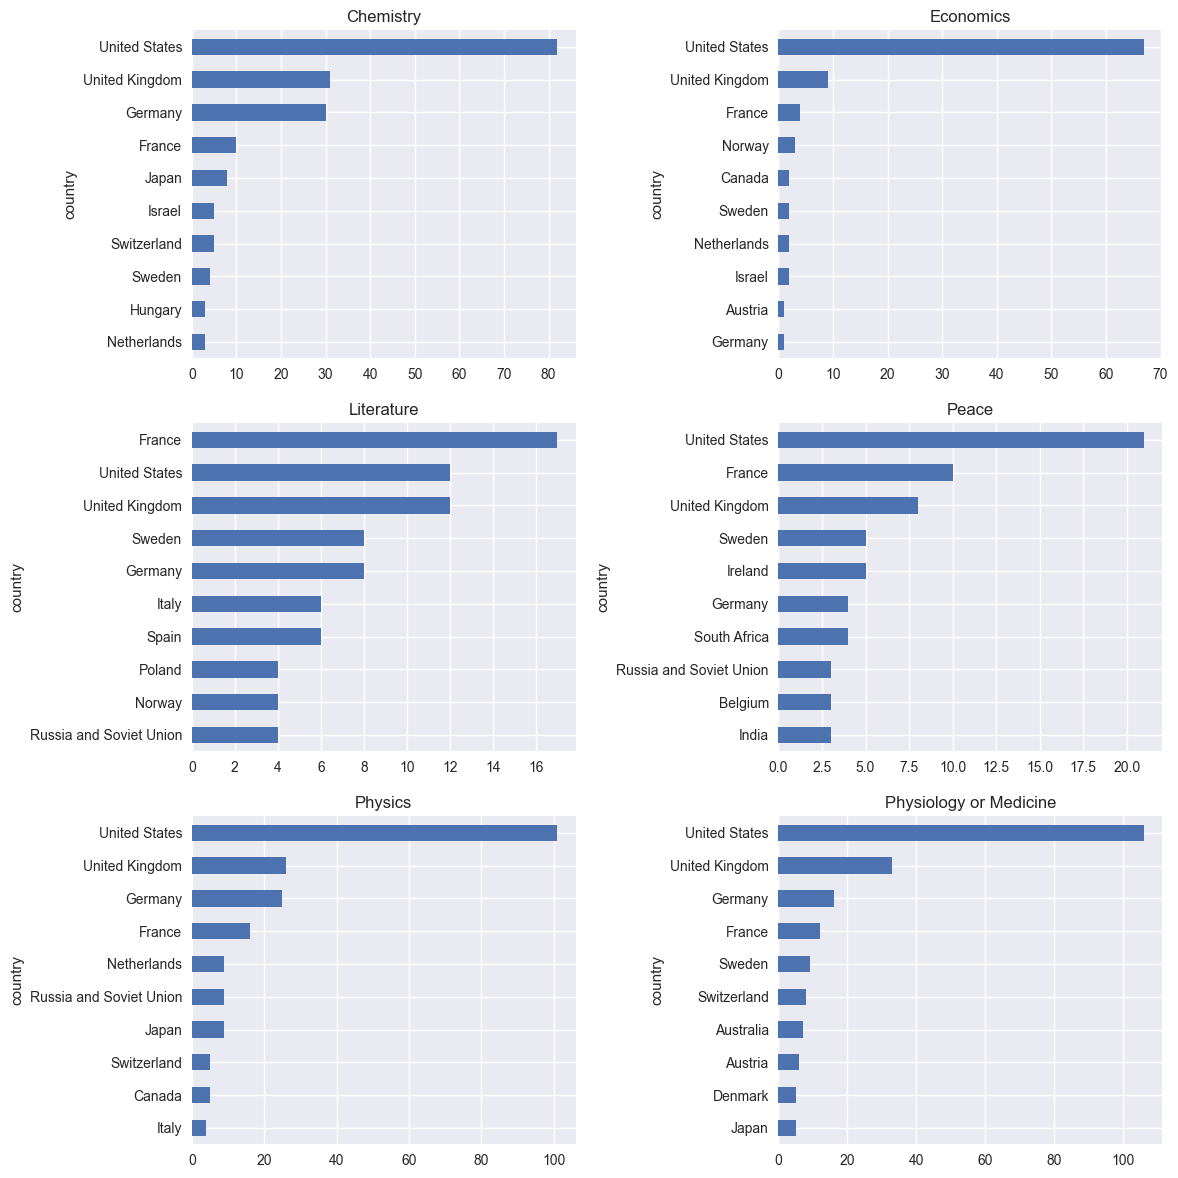

In [75]:
COL_NUM = 2
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i, (label, col) in enumerate(nat_cat_sz.items()):
    ax = axes[i // COL_NUM, i % COL_NUM]
    col = col.sort_values(ascending=False)[:10].sort_values(ascending=True)
    col.plot(kind="barh", ax=ax)
    ax.set_title(label)

plt.tight_layout()

### Historical Trends in Prize Distribution